- We play the following "fair" game
    - I wager $k$ dollars, and if it comes up tails I pay you $k$. If it's heads, you pay me $k$
    
- Suppose I pursue the following strategy:
    - My first wager is 1 dollar
        - Every time I lose, I double my wager from the previous game
            - I stop playing after my first win
            
a. *With this strategy, what are my expected winnings?*

b. *Why is this strategy unrealistic in real life?*

____

# a.

$$
E(\text{Winnings}) = P(W)\cdot1 + P(L)\cdot \left (P(W)\cdot2 + P(L)\cdot ... \right ) = 1
$$

- Let's simulate this to confirm our result

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
def sim():
    won = False
    total = 0
    wager = 1
    while not won:
        flip = np.random.randint(2)
        if flip == 1:
            total += wager
            won = True
        else:
            total -= wager
            wager *= 2
    return total

In [3]:
n_trials = 10000

list_results = []

for i in range(n_trials):
    result = sim() 
    list_results.append(result)

In [4]:
set(list_results)

{1}

- As we can see, there is no result other than winning 1

____

# b. 

- This strategy is unrealistic because we need to be able to wager an unlimited amount
    - Eventually, we'd get cut off
    
- We can show this using a plot of our paths

In [5]:
def sim2():
    list_path = []
    won = False
    total = 0
    wager = 1
    while not won:
        flip = np.random.randint(2)
        if flip == 1:
            total += wager
            won = True
        else:
            total -= wager
            wager *= 2
        list_path.append(total)
    return list_path

In [8]:
n_trials = 100

df_results = pd.DataFrame()

for i in range(n_trials):
    result = sim2() 
    df_result = pd.Series(result).to_frame(name=i)
    df_results = df_results.join(df_result, how='outer')

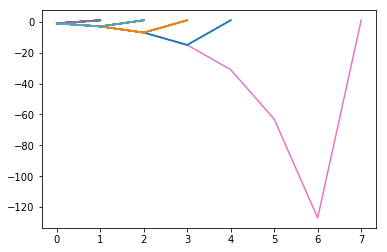

In [9]:
df_results.plot(legend=False)

- As we can see, in one of the trials, we got 120 dollars into the hole just to re-emerge with 1 dollar